# IMDB,Yelp & Amazon Review Classification

.

## IMPORTING LIBRARIES

In [5]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt

In [6]:
pip install spacy

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\USER\\anaconda3\\Lib\\site-packages\\thinc\\backends\\cblas.cpp'
Consider using the `--user` option or check the permissions.




  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/92/fb/d1f0605e1e8627226c6c96053fe1632e9a04a3fbcd8b5d715528cb95eb97/spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata
  Using cached spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata (27 kB)
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/92/fb/d1f0605e1e8627226c6c96053fe1632e9a04a3fbcd8b5d715528cb95eb97/spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata
  Using cached spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata (27 kB)
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368b

In [7]:
import spacy
from spacy import displacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 140.3 kB/s eta 0:01:31
     --------------------------------------- 0.0/12.8 MB 140.3 kB/s eta 0:01:31
     --------------------------------------- 0.0/12.8 MB 140.3 kB/s eta 0:01:31
     --------------------------------------- 0.0/12.8 MB 140.3 kB/s eta 0:01:31
     --------------------------------------- 0.0/12.8 MB 140.3 kB/s eta 0:01:31
     --------------------------------------- 0.0/12.8 MB 140.3 kB/s eta 0:01:31
     --------------------------------------- 0.0/12.8 MB 140.3 kB/s eta 0:01:31
     --------------------------------------- 0.0/12.8 MB 140.3 kB/s eta 0:01:31


In [8]:
nlp = spacy.load('en_core_web_sm')


## IMPORTING DATASETS

In [9]:
data_yelp=pd.read_csv("C:\\Users\\USER\\Downloads\\yelp_labelled (1).txt", sep='\t',header=None)


In [10]:
data_yelp.head()
# review and sentiment
# 0-Negative, 1-Positive for positive review

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
# Assign column names
columan_name = ['Review', 'Sentiment']
data_yelp.columns = columan_name

In [12]:
data_yelp.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [14]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 960.0 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 656.4 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 744.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 774.0 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 774.0 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 774.0 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 774.0 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 774.0 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 419.0 kB/s eta 0:00:

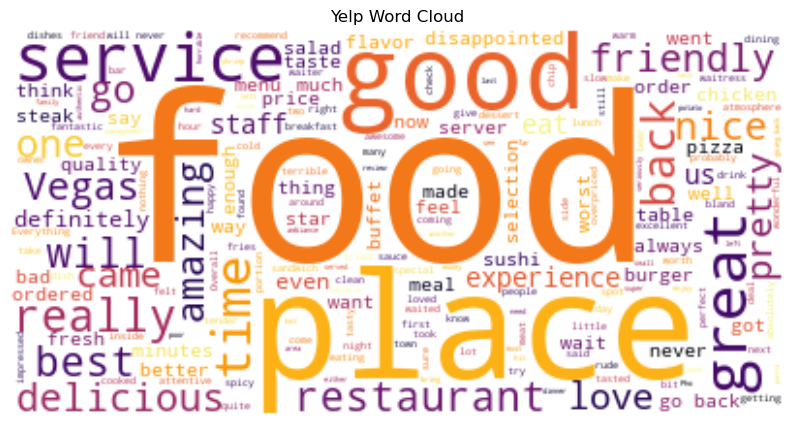

In [15]:
# Function to generate word cloud
def generate_wordcloud(text, title, colormap='plasma'):
 wordcloud = WordCloud(colormap=colormap, background_color='white').generate(text)
 plt.figure(figsize=(10, 6))
 plt.imshow(wordcloud, interpolation='bilinear')
 plt.title(title + ' Word Cloud')
 plt.axis('off')
 plt.show()
generate_wordcloud(' '.join(data_yelp['Review']), 'Yelp', colormap='inferno')

In [16]:
data_yelp.shape


(1000, 2)

 1000 rows (reviews), 2 columns (Sentiments)

In [18]:
data_amazon = pd.read_csv("C:\\Users\\USER\\Downloads\\amazon_cells_labelled (1).txt",sep='\t',header=None)


In [19]:
data_amazon.head()


,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


 review and sentiment
 0-Negative, 1-Positive for positive review

In [20]:
data_amazon.columns = columan_name

In [21]:
data_amazon.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


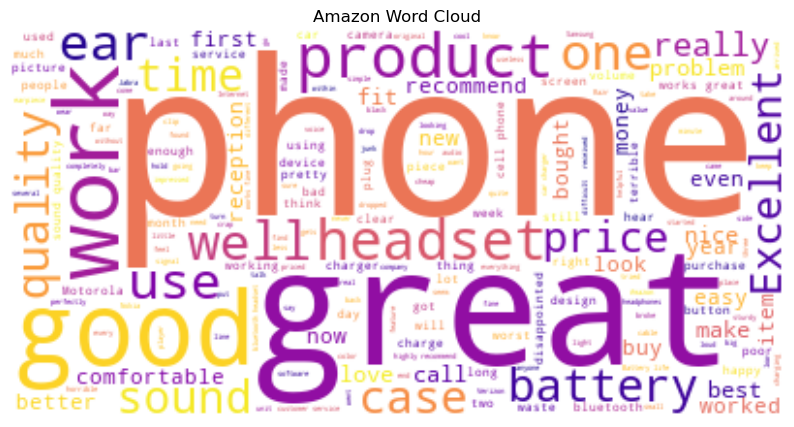

In [22]:

import matplotlib.pyplot as plt
def generate_wordcloud(text, title, colormap='viridis'):
 wordcloud = WordCloud(colormap=colormap, background_color='white').generate(text)
 plt.figure(figsize=(10, 6))
 plt.imshow(wordcloud, interpolation='bilinear')
 plt.title(title + ' Word Cloud')
 plt.axis('off')
 plt.show()
# Generate word cloud for Amazon with a different color
generate_wordcloud(' '.join(data_amazon['Review']), 'Amazon', colormap='plasma')

In [23]:
data_amazon.shape


(1000, 2)

In [25]:
data_imdb = pd.read_csv("C:\\Users\\USER\Downloads\\imdb_labelled (1).txt",sep='\t',header=None)


In [26]:
data_imdb.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [27]:
data_imdb.columns = columan_name


In [28]:
data_imdb.head()


,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


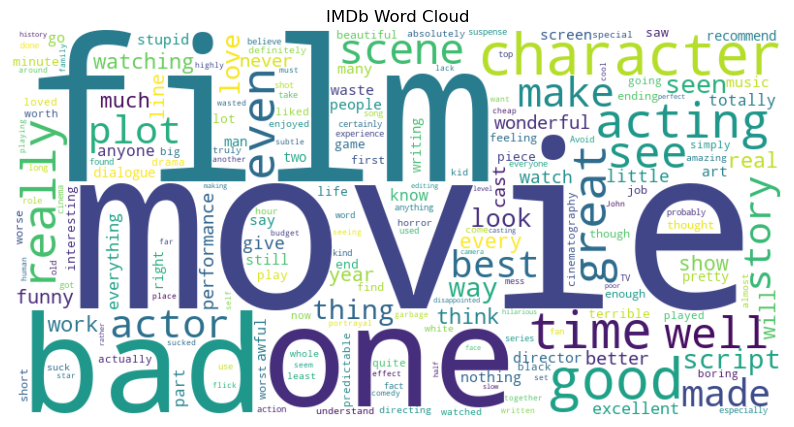

In [29]:
# Function to generate word cloud
def generate_wordcloud(text, title):
 wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
 plt.figure(figsize=(10, 6))
 plt.imshow(wordcloud, interpolation='bilinear')
 plt.title(title + ' Word Cloud')
 plt.axis('off')
 plt.show()
generate_wordcloud(' '.join(data_imdb['Review']), 'IMDb')

In [30]:
data_imdb.shape

(748, 2)

.

Now we are going to create data which will contain all the 3 datasets. We will append all the 3 datasets one after the other to get the
final dataset. ignore_index=True does not use the index values on the concatenation axis. The resulting axis will be labeled 0, …, n -1. The final dataset has 2748 rows and 2 columns.

In [31]:
data = data_yelp.append([data_amazon, data_imdb],ignore_index=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_4680\2120681373.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_yelp.append([data_amazon, data_imdb],ignore_index=True)


In [32]:
data.shape


(2748, 2)

In [33]:
data.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


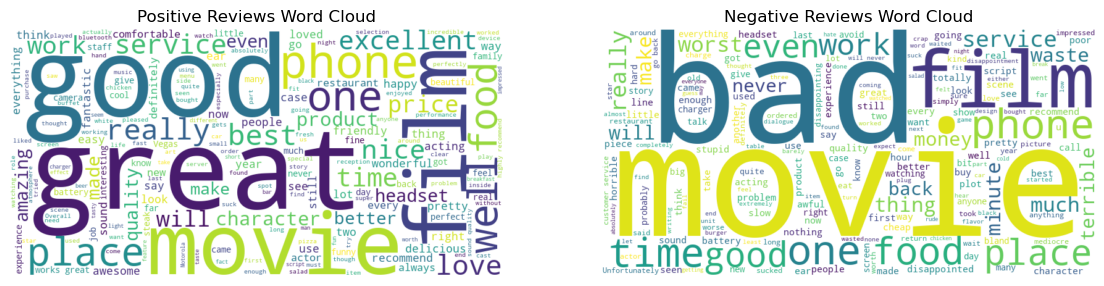

In [42]:
# word clouds to visualize the most common words in positive and negative reviews.

from wordcloud import WordCloud

positive_reviews = data[data['Sentiment'] == 1]['Review']
negative_reviews = data[data['Sentiment'] == 0]['Review']

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()


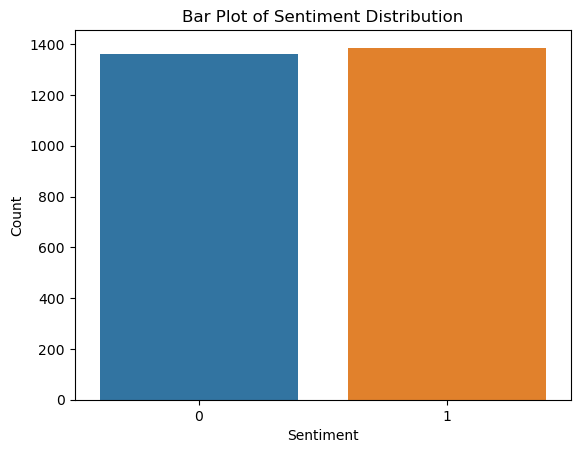

In [88]:
#Bar Plot of Sentiment Distribution

import seaborn as sns

sns.countplot(x='Sentiment', data=data)
plt.title('Bar Plot of Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


.

###     check distribution of sentiments
Now we will see the distribution of Sentiment in out dataset. The value_counts() function is used to get a Series containing counts of
unique values. In data there are 1386 positive sentiment reviews and 1362 negative reviews.

In [43]:
data['Sentiment'].value_counts()
# 1346 positive reviews
# 1362 Negative reviews

1    1386
0    1362
Name: Sentiment, dtype: int64

.

Now we will check if there are null values in our data using isnull(). As you can see there are no null values.


In [44]:
# check for null values
data.isnull().sum()
# no null values in the data

Review       0
Sentiment    0
dtype: int64

In [45]:
x = data['Review']
y = data['Sentiment']

.

# DATA CLEANING


### Tokenization and Lemmatization

here we will remove stopwords, punctuations as well as we will apply lemmatization

string.punctuation is a pre-initialized string used as string constant. It will give the all sets of punctuation.


In [46]:
import string
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS) # list of stopword
print(stopwords)

['who', 'latter', 'us', 'most', '‘ll', 'during', 'which', 'in', 'few', 'whither', 'does', 'everywhere', 'same', 'their', 'n‘t', 'more', 'become', 'where', 'now', 'beyond', 'without', 'out', 'herein', 'on', 'several', 'former', 'used', 'almost', 'alone', 'under', 'meanwhile', 'afterwards', 'enough', 'elsewhere', 'could', 'whenever', 'four', 'this', 'take', 'be', 'after', 'or', 'amongst', 'up', 'might', 'serious', 'once', 'upon', 'into', "n't", 'full', 'namely', '’s', 'with', 'anything', 'say', 'at', 'they', 'although', 'nowhere', 'amount', 'both', 'very', 'whereby', 'had', 'regarding', 'towards', 'so', 'if', 'ca', 'to', 'as', 'otherwise', 'only', 'therefore', 'toward', 'across', 'then', 'such', 'within', 'for', 'nothing', 'you', 'less', 'really', 'would', 'cannot', 'thence', 'ours', 'must', 'hereupon', 'also', 'some', 'show', 'via', 'until', 'further', 'my', 'just', 'i', 'has', 'last', 'done', 'am', 'do', 'will', 'myself', 'hereby', 'hers', 'someone', 'another', 'each', '’d', '’re', 'ra

In [48]:
len(stopwords)


326

.

Here we are printing all the tokens excluding the stopwords.
In lemmatization, the words are replaced by the root words or the words with similar context. For
example, given the word went, the lemma would be 'go' since went is the past form of go. Below we have
printed the tokens and the lemma for each token.










In the function text_data_cleaning() we are first converting the sentence into tokens. Then for each token we are performing
lemmatization. If the lemma is not a pronoun we are converting the lemma to lower case; else we are converting the token to lowercase. Finally we are removing all the stopwords and punctuation marks.

In [56]:
punct = spacy.lang.punctuation.LIST_PUNCT

def text_data_cleaning(sentence):
    doc = nlp(sentence)
    
    tokens = [] # list of tokens
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
        
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
             cleaned_tokens.append(token)
    return cleaned_tokens


In [57]:
text_data_cleaning("Hello all, It's a beautiful day outside there!")
# stopwords and punctuations removed

['hello', 'beautiful', 'day', 'outside', '!']

.

# Vectorization Feature Engineering (TF-IDF)
TfidfVectorizer() converts a collection of raw documents to a matrix of TF-IDF features. We have passed text_data_cleaning() as thetokenizer. LinearSVC is a faster implementation of Support Vector Classification for the case of a linear kernel.


In [62]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [63]:
tfidf =TfidfVectorizer(tokenizer=text_data_cleaning)
# tokenizer=text_data_cleaning, tokenization will be done according to this function

In [64]:
classifier = LinearSVC()

.

X contains the feature space and Y contains the labels.

In [65]:
X = data['Review']
y = data['Sentiment']


# TRAIN THE MODEL


Here we are dividing the data into training data and test data using train_test_split() from sklearn
which we have already imported. We are going to use 80% of the data for training the model and 20% of the
data for testing. random_state controls the shuffling applied to the data before applying the split.
We can see that we have got 2198 samples in the traning dataset and 550 samples in the test dataset.


In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [67]:
x_train.shape, x_test.shape
# 2198 samples in training dataset and 550 in test dataset

((2198,), (550,))

In [68]:
x_train.head()

2572    An Italian reviewer called this "a small, grea...
526                          And it was way to expensive.
1509    As an earlier review noted, plug in this charg...
144     Nice blanket of moz over top but i feel like t...
2483    The film gives meaning to the phrase, "Never i...
Name: Review, dtype: object

.

Pipeline enables us to apply a pipeline of transforms with a final estimator. It sequentially applies a list of transforms and a final
estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final
estimator only needs to implement fit. The purpose of the pipeline is to assemble several steps that can be cross-validated together
while setting different parameters. The parameter passed in Pipeline are a list of (name, transform) tuples (implementing
fit/transform) that are chained, in the order in which they are chained, with the last object an estimator.

In [69]:
cclf = Pipeline([('tfidf',tfidf), ('clf',classifier)])
# it will first do vectorization and then it will do classifiation

In [70]:
from sklearn.pipeline import Pipeline
# Define your pipeline 'cclf'
cclf = Pipeline([('tfidf', tfidf), ('clf', classifier)])
# Fit the pipeline to your training data
cclf.fit(x_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x000001BED6CAB6A0>)),
                ('clf', LinearSVC())])

.

## PREDICT TEST RESULTS

In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [72]:
y_pred = cclf.predict(x_test)

.

confusion_matrix() computes confusion matrix to evaluate the accuracy of a classification. By definition a confusion matrix C is such
that C(i,j) is equal to the number of observations known to be in group i and predicted to be in group j. Thus in binary classification,
the count of true negatives is C(0,0), false negatives is C(1,0), true positives is C(1,1) and false positives is C(0,1).

In [73]:
# confusion_matrix
confusion_matrix(y_test, y_pred)


array([[201,  78],
       [ 50, 221]], dtype=int64)

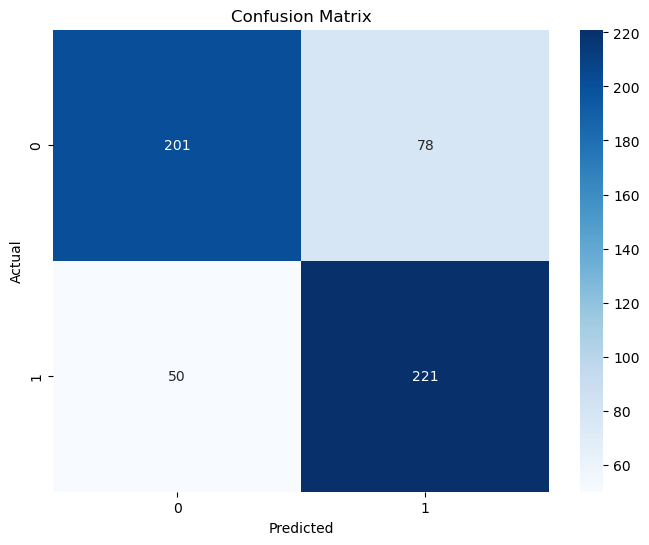

In [74]:
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [89]:
# classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.80      0.72      0.76       279
           1       0.74      0.82      0.78       271

    accuracy                           0.77       550
   macro avg       0.77      0.77      0.77       550
weighted avg       0.77      0.77      0.77       550



<Figure size 1200x600 with 0 Axes>

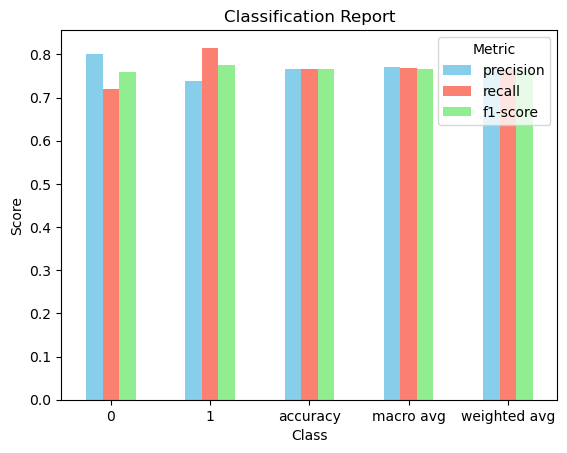

In [81]:
from sklearn.metrics import classification_report

# Get classification report
report = classification_report(y_test, y_pred, output_dict=True)
 
# Convert report to DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score for each class
plt.figure(figsize=(12,6))
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.show()


In [76]:
accuracy_score(y_test, y_pred)


0.7672727272727272

 76% accuracy

.

### using function to predict final outcome

In [ ]:
def predict_sentiment(review):
    # Predict sentiment using the trained model
    sentiment = cclf.predict([review])[0]
    
    # Convert sentiment label to human-readable form
    sentiment_label = 'Positive' if sentiment == 1 else 'Negative'
    
    return sentiment_label

# Get user input for a review
user_review = input("Enter your review: ")

# Predict sentiment for the user input review
prediction = predict_sentiment(user_review)

# Display the predicted sentiment
print("Predicted Sentiment:", prediction)
